# Broken Bottles
Despite an overall decline in crime, the bloodshed and violence continues in many of the City's poorest neighborhoods. Frustrated and distressed, community and religious leaders are calling for immediate action. Citing studies linking alcohol to <A HREF="https://www.ncbi.nlm.nih.gov/labs/articles/11496969/">gang violence</A> and to other violent crime, they are putting pressure on city and state officials to close liquor establishments, to decline new liquor license requests, and to reduce access to alcohol in the most violent neighborhoods. Meanwhile, local business owners are banding together, rallying to block the proposed restrictions. They cite violations of the fifth and fourteenth U.S. Constitutional Amendments and claim the proposed restrictions would negatively impact the social fabric and tourism of the City.

The Chief of Police is asking you, the Crime Analyst, to determine if there is indeed a relationship between violent crime and liquor establishments in your City. She wants your recommendations for an effective solution.

You know that this<A HREF="http://venturacountylimits.org/resource_documents/VC_IssueBrief_AlcRetail_2010_web.pdf"> issue</A> has surfaced for different cities around the country and that a number of<A HREF="http://www.jrsa.org/ibrrc/references/New_Mexico/NM_PlaceCrime.pdf"> research studies </A>have demonstrated a <A HREF="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3412911/"> correlation between liquor establishments and violent crime</A>. There are also theoretical explanations supporting this relationship such as<A HREF="http://desktop.arcgis.com/en/analytics/case-studies/broken-bottles-6-references.htm#GUID-ED803264-CDA1-401F-94C9-A8F021F8C858"> routine activity theory </A>and <A HREF="http://desktop.arcgis.com/en/analytics/case-studies/broken-bottles-6-references.htm#ESRI_SECTION1_191B9FDB5308478A9F08568B485A145B">social disorganization theory</A>.

Your workflow is summarized below.

![](images/A.png)

### What data will you need?
Since you are interested in violent crime, you collect data for the homicides, rape, robbery, aggravated assault, and aggravated battery incidents over the past year. Next, using<A HREF="http://www.esri.com/software/businessanalyst"> ArcGIS Business Analyst</A>, you obtain a dataset of businesses that either sell or serve alcohol (this includes bars, nightclubs, lounges, taverns, liquor stores, and so on). If you need additional data, you will use the<A HREF="http://resources.arcgis.com/en/communities/sharepoint/01t800000007000000.htm"> data enrichment</A> tools in ArcGIS to get it. Your point data is shown below.

![](images/B.png)

It is difficult to discern spatial patterns with so many points on the map.


### Where are the violent crime hot spots? Where are the hot spots for businesses selling or serving alcohol?<BR> Do they overlap?
To make sense of the more than 22,000 crime points, and over 1,500 business points, you map them using hot spot analysis. These maps show you the statistically significant hot spots (red) and cold spots (blue) for violent crime and for liquor establishments. If violent crime is linked to liquor establishments, you expect to see spatial correspondence between their activity spaces.

![](images/C.png)

The violent crime and liquor vendor hot spot maps look very different.

You notice some overlap in the downtown area. To ensure that the remediation efforts you propose focus on your city's most vulnerable neighborhoods, while avoiding areas that could impact tourism, you will need a better understanding of neighborhood poverty patterns within those overlap areas.

### Where are the City's most vulnerable neighborhoods?
You obtain the data needed to create a hot spot map of poverty.

![](images/D.png)

The red areas are statistically significant hot spots for poverty.

### Which areas should be included in a moratorium on new liquor licenses?
You will recommend remediation measures for statistically significant hot spots (99 percent confidence) across all three variables: violent crime, existing liquor establishments, and poverty. To find these areas, you overlay all three maps, keeping only the hot spot locations that overlap.

![](images/E.png)

With the exception of the small overlapping areas identified above, you didn't find a strong spatial correlation between violent crime and businesses that sell or serve alcohol.

Still, the community representatives have indicated that the problem is serious. While you work with numbers every day, you know that there are real faces—real people—behind your data. You decide to dig deeper.

### Has violent crime been increasing in the City? If so, where?
Space-time pattern mining will show you if violent crime has been increasing or not. The maps below show the results of this analysis. You notice several locations with intensifying violent crime hot spots and a number of persistent hot spots as well. Consecutive hot spots are also worrisome; these represent hot spot locations that have been statistically significant for several of the most recent time periods.

![](images/F.png)

There are several concerning trends including new, intensifying, and persistent hot spot areas.<BR><BR>
The 3D map below is zoomed in to the area of both sporadic and consecutive violent crime hot spot trends in the downtown area. The green squares at the base of the map delineate one of the liquor moratorium remediation areas you identified above. Each bin in the 3D stack represents a four-week time period, with the most recent time period at the top. The darkest red bins reflect locations and time periods with intense violent crime activity.

![](images/G.png)

A 3D view of violent crime trends downtown

There are definitely locations around the City where violent crime is persistent and even intensifying; most of these do not correspond to high densities of businesses serving or selling alcohol, however.

### What else might be contributing to violent crime?<BR>
Two years ago the City implemented a Summer Jobs Program that has proven tremendously effective at reducing violent crime. You obtain unemployment data and repeat your hot spot analysis to see if you find a stronger spatial correlation between unemployment and violent crime than you did between liquor establishments and violent crime. Interestingly, you do.

![](images/H.png)

There are a number of locations where the violent crime and unemployment hot spots overlap

### Where do persistent, intensifying, and consecutive hot spots overlap with unemployment hot spots?
You will recommend remediation measures for the areas where persistent, intensifying, and consecutive hot spot trends overlap with the statistically significant unemployment hot spots (99 percent confidence).

![](images/I.png)

Overlap between violent crime trends and unemployment hot spots
The blue areas are the locations where intensifying, persistent, and consecutive hot spot trends overlap with the most intense unemployment hot spots.

### Which specific high schools should be targeted for an expanded summer jobs program?<BR>
You identify high schools within a quarter mile of the remediation areas where high violent crime and high unemployment overlap.

![](images/J.png)

You will recommend that several schools be included in an expanded summer jobs program.<BR><BR>
Your analyses have gone well! You have several recommendations to propose to the Chief of Police.



### Final recommendations

![](images/K.png)

Your final report will include the map above showing your recommendations below.

![](images/L.PNG)

# Analyzing violent crime, workflow
## Workflow using Python ArcGIS


Connect your ArcGIS online organization.

In [2]:
from arcgis import *

In [3]:
gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssword123")

Accessing the content property of your gis object you can use the `search()` method. 
Search for **CrimeAnalysisData** content made by other users by turning the **outside_org** to True.

In [3]:
items = gis.content.search('title:CrimeAnalysisData owner:lscott_ANGP', outside_org=True)

Importing the **display** module

In [4]:
from IPython.display import display

<Item title:"CrimeAnalysisData" type:Feature Layer Collection owner:lscott_ANGP>
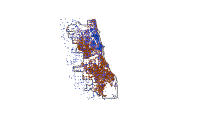

In [5]:
for item in items:
    display(item)

Getting the first item 

In [6]:
crime_item = items[0]

Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [7]:
lyrs = crime_item.layers

The code below cycles through the layers and print their names.

In [8]:
for lyr in lyrs:
    print(lyr.properties.name)

Public High Schools
Liquor Vendors
Violent Crime 2014
Analysis Boundary


Getting the second layer and saving it in **violent_crimes**.

In [9]:
violent_crimes = lyrs[2]

In [10]:
analysis_boundary = lyrs[3]

In [11]:
violent_crimes

<FeatureLayer url:"https://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/CrimeAnalysisData/FeatureServer/2">

The GIS object includes a map widget for displaying geographic locations, visualizing GIS content, as well as the results of your analysis. To use the map widget, call gis.map() and assign it to a variable.

In [12]:
chicago_map = gis.map('Chicago')
chicago_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](images/map1.PNG)

## Analyzing patterns in featurte data
`GIS` has a set of tools to help you identify, quantify and visualize satial patterns in your data by identifying areas of statistically significant clusters. 
The  `find_hot_spots` tool allows you to visualize areas having significant clusters.

In [13]:
from arcgis.features.analyze_patterns import find_hot_spots

In [14]:
crime_hot_spots = find_hot_spots(violent_crimes, output_name='Crime_Hot_Spots', bounding_polygon_layer= analysis_boundary)

In [15]:
crime_hot_spots

<Item title:"Crime_Hot_Spots" type:Feature Layer Collection owner:demo_deldev>

In [16]:
crime_spots_map = gis.map('Chicago')
crime_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](images/map2.PNG)

You can add a number of different layer objects such as FeatureLayer, FeatureCollection, ImageryLayer, MapImageLayer to the map
by calling the add_layer() method.

In [17]:
crime_spots_map.add_layer(crime_hot_spots)

Getting the liquor_vendors layer from the lyrs item

In [18]:
liquor_vendors = lyrs[1]

Find hotspots for **liquor_vendors** layer

In [19]:
liquor_vendor_hot_spots = find_hot_spots(liquor_vendors,
                                         output_name='liquor Hot Spots', aggregation_polygon_layer= crime_hot_spots)

In [20]:
liquor_vendor_hot_spots

<Item title:"liquor Hot Spots" type:Feature Layer Collection owner:demo_deldev>

visualizing **liquor_vendor_hot_spots** on map

In [21]:
liquor_hot_spots_map = gis.map('Chicago')
liquor_hot_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [22]:
liquor_hot_spots_map.add_layer(liquor_vendor_hot_spots)

![](images/map3.PNG)

### Enriching study areas
The `enrich_layer` tool gives you demographic and landascape data for the people, places, and businesses in a specific area, or within a selected travel time or distance from a location. 

In [23]:
from arcgis.features.enrich_data import enrich_layer

you can add analysis variables as a list variables you want to enrich your data with.

In [24]:
enriched_layer = enrich_layer(crime_hot_spots, 
                              analysis_variables=["households.ACSHHBPOV"], 
                              output_name='Poverty Data')

In [25]:
enriched_layer

<Item title:"Poverty Data" type:Feature Layer Collection owner:demo_deldev>

Loading map and visualizing

In [26]:
crime_enriched_map = gis.map('Chicago')
crime_enriched_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [27]:
crime_enriched_map.add_layer(enriched_layer)

![](images/map4.PNG)

You can find hot spots of the enriched_layer keeping the parameter analysis_field as the field from the analyisis variable.

In [28]:
poverty_data_hot_spots = find_hot_spots(enriched_layer, analysis_field='ACSHHBPOV',
                                         output_name='poverty enriched hot spots')

Load the map again to visualize the poverty_data_hot_spots

In [29]:
poverty_data_hot_spots_map = gis.map('Chicago')
poverty_data_hot_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [30]:
poverty_data_hot_spots_map.add_layer(poverty_data_hot_spots)

![](images/map5.PNG)

Filter the crime_hot_spots,liquor_vendor_hot_spots, poverty_data_hot_spots by selecting only those places where the Gi_Bin attribute is 3 (this is the code for statistically significant hot spots at the 99 percent confidence level)

In [31]:
crimelayer = crime_hot_spots.layers[0]
crimelayer.filter = "Gi_Bin = 3"

In [32]:
liquorlayer = liquor_vendor_hot_spots.layers[0]
liquorlayer.filter = "Gi_Bin = 3"

In [34]:
povertylayer = poverty_data_hot_spots.layers[0]
povertylayer.filter = "Gi_Bin = 3"

# overlay_layers tool 
`overlay_layers` combines two or more layers into one single layer. You can think of overlay as peering through a stack of maps and creating a single map containing all the information found in the stack.
The `Overlay Layers` tool requires two inputs: an input layer and an overlay layer. 
Use Overlay Layers to combine two layers into a single layer using an intersect, union, or erase method. 

In [35]:
from arcgis.features.manage_data import overlay_layers

In [36]:
intersect_of_crime_vendor = overlay_layers(crimelayer, liquorlayer, tolerance=0, context={},
                           output_name="intersect of crime vendor")

In [37]:
intersect_of_crime_vendor

<Item title:"intersect of crime vendor" type:Feature Layer Collection owner:demo_deldev>

In [38]:
intersected = overlay_layers(intersect_of_crime_vendor, poverty_data_hot_spots,
                             output_name="intersect of crime vendor poverty")

In [39]:
intersected

<Item title:"intersect of crime vendor poverty" type:Feature Layer Collection owner:demo_deldev>

Load the overlay layer on the map.

In [40]:
intersected_map = gis.map('Chicago')
intersected_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [41]:
intersected_map.add_layer(intersected)

![](images/map6.PNG)

Acsesing the content property of your gis use `search()` method to search for **crime_trend** feature layer collection outside organization.

In [42]:
crime_trend = gis.content.search('title:ViolentCrimeTrend owner:lscott_ANGP', outside_org=True)

Display the items of the contents searchd.

<Item title:"ViolentCrimeTrends" type:Feature Layer Collection owner:lscott_ANGP>
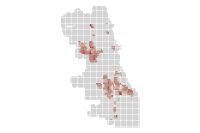

In [43]:
for item in crime_trend:
    display(item)

Get the first item from crime_trend. 

In [44]:
crime_trend_item = crime_trend[0]

<Item title:"ViolentCrimeTrends" type:Feature Layer Collection owner:lscott_ANGP>
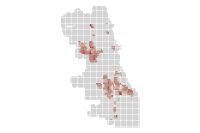

In [45]:
crime_trend_item

Assign a variable name **crime_trend_layer** to the first layer from the features layer collection .

In [46]:
crime_trend_layer = crime_trend_item.layers[0]

Load and visualize the crime_trend_layer on map.

In [47]:
crime_trends_map = gis.map('Chicago')
crime_trends_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [48]:
crime_trends_map.add_layer(crime_trend_layer)

![](images/map7.PNG)

Use the `enrich_layer` tool to add more demographic information to the layer.

In [49]:
crime_trend_enriched_unemployment = enrich_layer(crime_trend_layer, 
                              analysis_variables=["industry.UNEMPRT_CY"], 
                              output_name='Unemployment enriched layer')

Use find_hot_spots tool to spot hot spots of **cime_trend_enriched_unemployment** layer.

In [50]:
unemployment_rate_hot_spots = find_hot_spots(crime_trend_enriched_unemployment,
                                             analysis_field='UNEMPRT_CY',
                                         output_name='unemployment Rate hotspots')

Load and visualize hot spots on map.

In [51]:
unemployment_rate_hot_spots_map = gis.map('Chicago')
unemployment_rate_hot_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [52]:
unemployment_rate_hot_spots_map.add_layer(unemployment_rate_hot_spots)

![](images/map8.PNG)

filter unemployment_rate_hot_spots to select locations where the Gi_Bin Fixed 4554_FDR field is 3 (this is the code for statistically significant hot spots at the 99 percent confidence level).
Filter the most intense unemployment hot spots

In [53]:
unemployment_rate_hot_spots.layers[0].filter = "Gi_Bin = 3"

For the crime trends map, you are interested in specific Pattern Type values: Intensifying, Consecutive, and Persistent hot spots. 

In [54]:
crime_trend_layer.filter = "(PATTERN = 'Consecutive Hot Spot') OR (PATTERN = 'Intensifying Hot Spot') OR (PATTERN = 'Persistent Hot Spot')"

Use `overlay_layers` tool to find areas that are common to crime trend layer and unemployment_rate_hot_spots.

In [55]:
overlay = overlay_layers(crime_trend_layer, unemployment_rate_hot_spots,
                         output_name="Overlay UnEmployment Crimetrend")

In [56]:
overlay

<Item title:"Overlay UnEmployment Crimetrend" type:Feature Layer Collection owner:demo_deldev>

Load and visualize on map.

In [57]:
overlay_map = gis.map('Chicago')
overlay_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [58]:
overlay_map.add_layer(overlay)

![](images/map9.PNG)

Getting the first layer and saving it in **public_high_school_layer**.

In [59]:
public_high_school_layer = lyrs[0]

In [60]:
from arcgis.features.find_locations import find_existing_locations 

In [61]:
public_high_school_layer.url

'https://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/CrimeAnalysisData/FeatureServer/0'

In [62]:
nearby_schools = find_existing_locations(input_layers=[ {'url': public_high_school_layer.url},
                                                       {'url': crime_trend_enriched_unemployment.layers[0].url}], 
                        expressions=[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"withinDistance",
                                      "distance":0.25,"units":"Miles"}], output_name='Nearby_Schools')

In [63]:
nearby_schools

<Item title:"Nearby_Schools" type:Feature Layer Collection owner:demo_deldev>

In [64]:
selected_high_schools_map = gis.map('Chicago')
selected_high_schools_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [65]:
selected_high_schools_map.add_layer(nearby_schools)

![](images/map10.PNG)